In [124]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
#import pandas_datareader.data
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [125]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [126]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [127]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
        #Set DataFrame as the Stock Ticker
        globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [39]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-05,186.410004,184.279999,185.259995,185.399994,16604200.0,182.620163
2018-07-06,188.429993,185.199997,185.419998,187.970001,17485200.0,185.151627
2018-07-09,190.679993,189.300003,189.500000,190.580002,19756600.0,187.722488
2018-07-10,191.279999,190.179993,190.710007,190.350006,15939100.0,187.495941
2018-07-11,189.779999,187.610001,188.500000,187.880005,18831500.0,185.062973


In [40]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,193.945937,190.029323,191.945657,192.050518,3.250696e+07,190.602477
std,21.720097,21.488701,21.580734,21.584098,1.392939e+07,21.130958
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,141.039642
25%,175.934998,173.555000,174.805000,174.794998,2.303000e+07,174.024834
50%,194.460007,190.300003,191.779999,191.880005,2.966390e+07,190.506363
75%,210.089996,206.904999,209.315002,208.875000,3.876575e+07,206.743652
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [41]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-07-05 to 2019-07-03
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


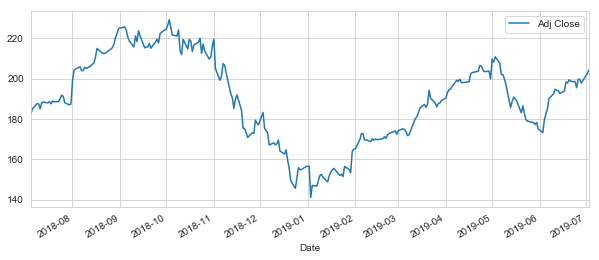

In [42]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

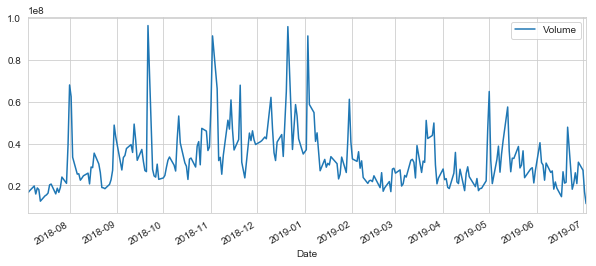

In [43]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [47]:
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days"%(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

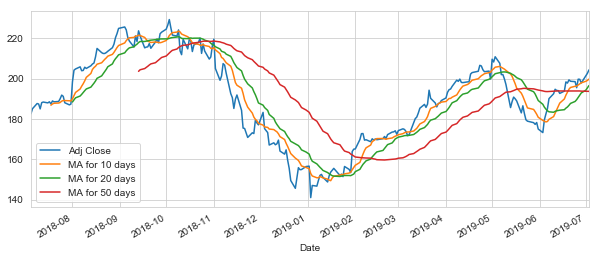

In [53]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

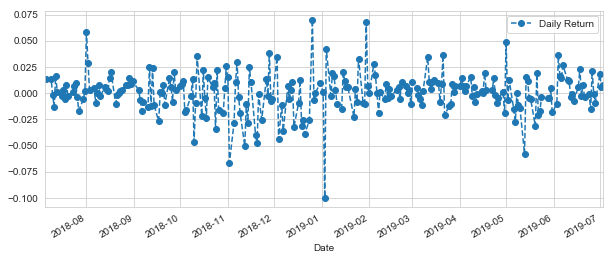

In [56]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

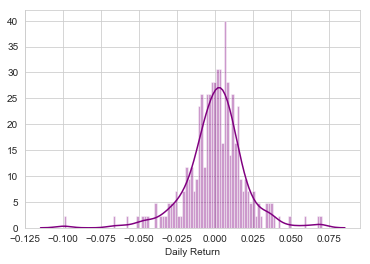

In [57]:
#distplot show two plots on the top of each other
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

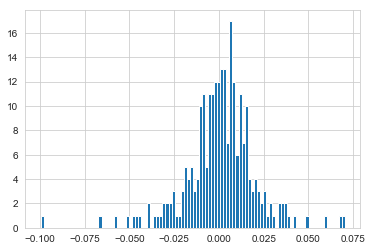

In [58]:
AAPL['Daily Return'].hist(bins=100)

In [60]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [61]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-05,182.620163,1699.729980,1124.270020,98.165932
2018-07-06,185.151627,1710.630005,1140.170044,99.543556
2018-07-09,187.722488,1739.020020,1154.050049,100.222542
2018-07-10,187.495941,1743.069946,1152.839966,100.488220
2018-07-11,185.062973,1755.000000,1153.900024,100.350464


In [62]:
tech_rets = closing_df.pct_change()

In [63]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-05,NaN,NaN,NaN,NaN
2018-07-06,0.013862,0.006413,0.014143,0.014034
2018-07-09,0.013885,0.016596,0.012174,0.006821
2018-07-10,-0.001207,0.002329,-0.001049,0.002651
2018-07-11,-0.012976,0.006844,0.000920,-0.001371


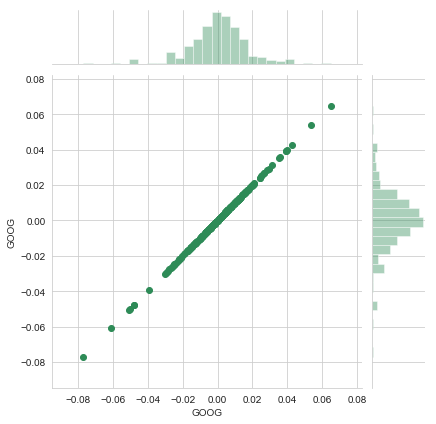

In [64]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

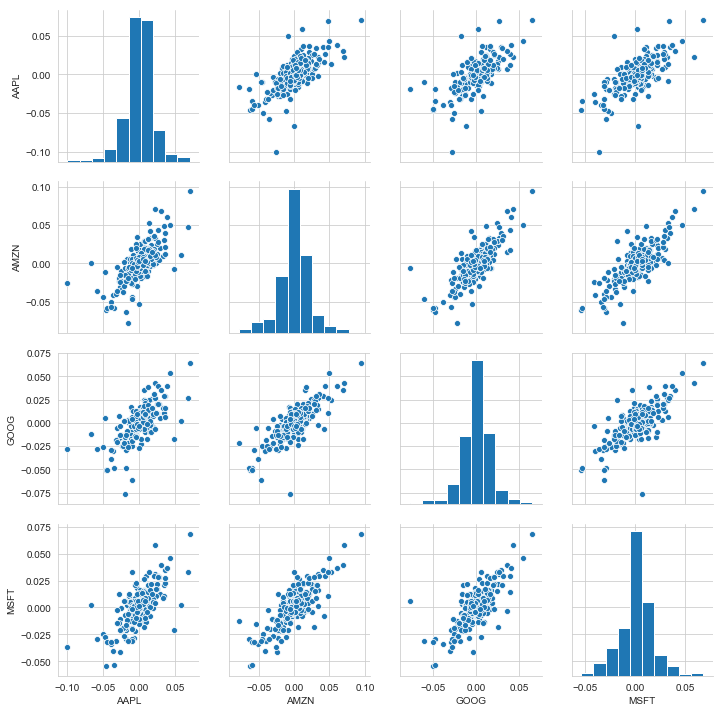

In [69]:
sns.pairplot(tech_rets.dropna())

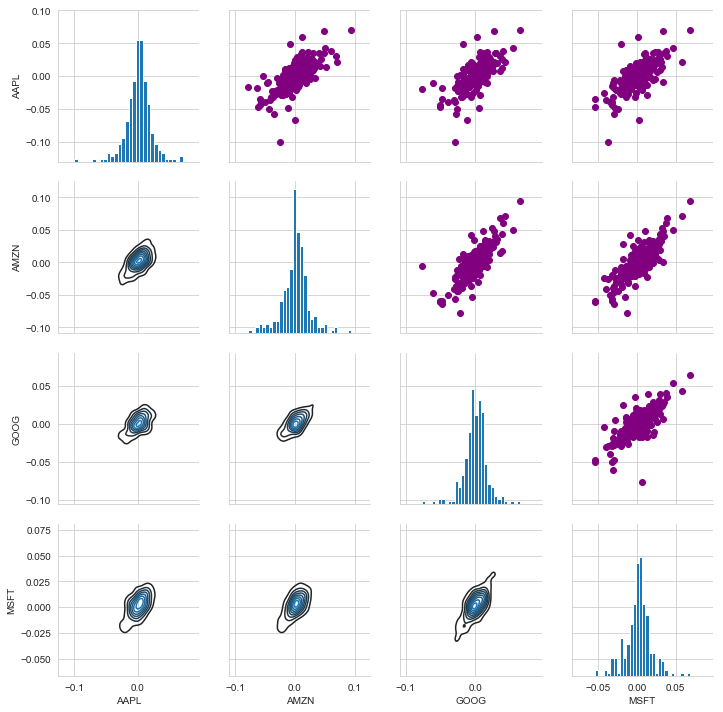

In [75]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist,bins=30)

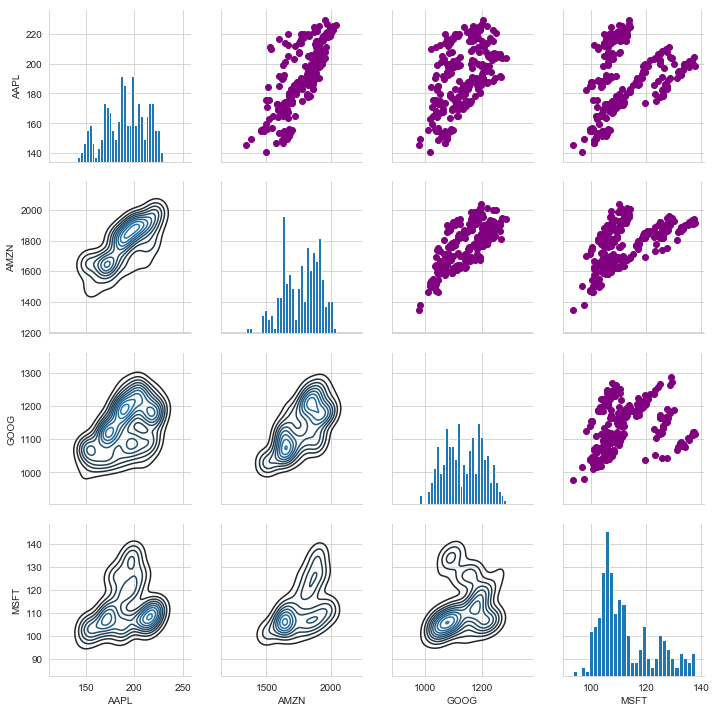

In [76]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist,bins=30)

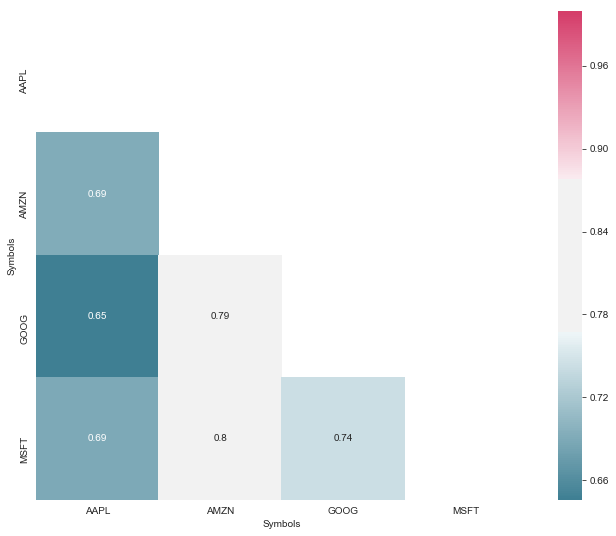

In [85]:
# Compute the correlation matrix
corr = tech_rets.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True,cmap=sns.diverging_palette(220, 0 ,sep=80,n=7,as_cmap=True))

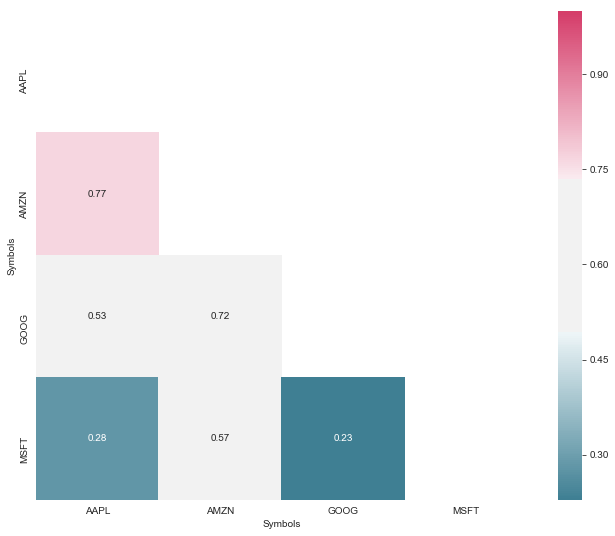

In [84]:
# Compute the correlation matrix
corr = closing_df.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,annot=True,cmap=sns.diverging_palette(220, 0 ,sep=80,n=7,as_cmap=True))

In [87]:
rets = tech_rets.dropna()

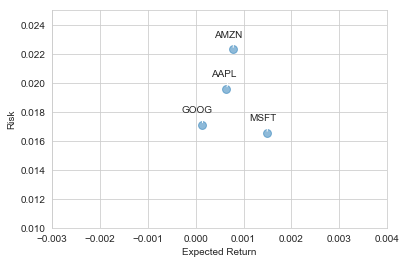

In [104]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


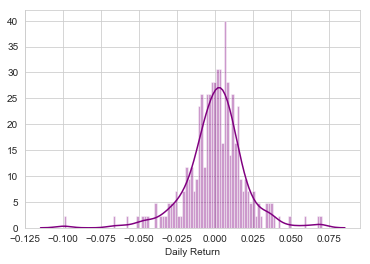

In [105]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [106]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.0312346728634737

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [109]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
        
GOOG.head()       

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-05,1127.500000,1108.479980,1110.530029,1124.270020,1066700,1124.270020
2018-07-06,1140.930054,1120.737061,1123.579956,1140.170044,996100,1140.170044
2018-07-09,1154.670044,1143.420044,1148.479980,1154.050049,909000,1154.050049
2018-07-10,1159.589966,1149.589966,1156.979980,1152.839966,798400,1152.839966
2018-07-11,1164.290039,1141.000000,1144.589966,1153.900024,1120000,1153.900024


Text(0.5,1,'Monte Carlo Analysis for Google')

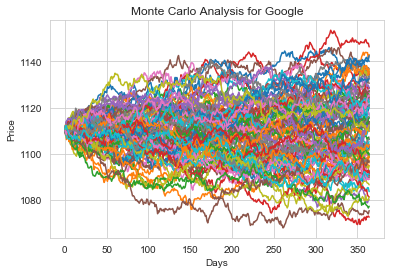

In [110]:
# Get start price from GOOG.head()
start_price = 1110.53

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [113]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

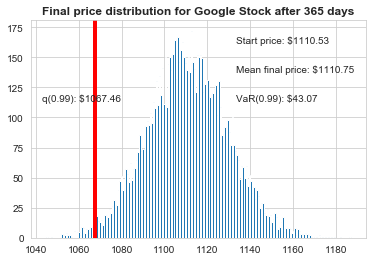

In [116]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');